In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


housing = pd.DataFrame(pd.read_csv('Housing.csv'))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [2]:
maplist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
varlist = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
def binary_map(x):
    return x.map({'yes': 1, "no" : 0})
housing[maplist] = housing[maplist].apply(binary_map)
housingProblem1 = housing[varlist]
housingProblem2 = housing[varlist]
housingProblem2

,price,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,13300000,7420,4,2,3,2,1,0,0,0,1,1
1,12250000,8960,4,4,4,3,1,0,0,0,1,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1
3,12215000,7500,4,2,2,3,1,0,1,0,1,1
4,11410000,7420,4,1,2,2,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0


In [3]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
prob1Train, prob1Test = train_test_split(housingProblem1, train_size = 0.7, test_size = 0.3, random_state = 42)
prob1Train

,price,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
126,5880000,7160,3,1,1,2,1,0,1,0,0,1
363,3710000,3584,2,1,1,0,1,0,0,1,0,0
370,3640000,4280,2,1,1,2,1,0,0,0,1,0
31,8400000,7000,3,1,4,2,1,0,0,0,1,0
113,6083000,9620,3,1,1,2,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
71,6755000,6000,4,2,4,0,1,0,0,0,1,0
106,6160000,5450,4,2,1,0,1,0,1,0,1,1
270,4340000,4500,3,2,3,1,1,0,0,1,0,0
435,3290000,4040,2,1,1,0,1,0,0,0,0,0


In [4]:
# This is where the normalization or standardization will occur for our dataset



import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, StandardScaler

#Only one can be used at a time so the unused one is commented out
scaler = MinMaxScaler()
#scaler = StandardScaler()
housingProblem2[varlist] = scaler.fit_transform(housingProblem2[varlist])

prob2Train, prob2Test = train_test_split(housingProblem2, train_size = 0.7, test_size = 0.3, random_state = 42)
prob2Train

,price,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
126,0.357576,0.378694,0.4,0.000000,0.000000,0.666667,1.0,0.0,1.0,0.0,0.0,1.0
363,0.169697,0.132921,0.2,0.000000,0.000000,0.000000,1.0,0.0,0.0,1.0,0.0,0.0
370,0.163636,0.180756,0.2,0.000000,0.000000,0.666667,1.0,0.0,0.0,0.0,1.0,0.0
31,0.575758,0.367698,0.4,0.000000,1.000000,0.666667,1.0,0.0,0.0,0.0,1.0,0.0
113,0.375152,0.547766,0.4,0.000000,0.000000,0.666667,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.433333,0.298969,0.6,0.333333,1.000000,0.000000,1.0,0.0,0.0,0.0,1.0,0.0
106,0.381818,0.261168,0.6,0.333333,0.000000,0.000000,1.0,0.0,1.0,0.0,1.0,1.0
270,0.224242,0.195876,0.4,0.333333,0.666667,0.333333,1.0,0.0,0.0,1.0,0.0,0.0
435,0.133333,0.164261,0.2,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0


In [5]:
#These X Values will be utilized for the part A for Problem 1a


X_1 = prob1Train.values[:,1:6] #Training inputs for Problem 1a
Y = prob1Train.values[:,0] # Training for Problem 1a and 1b
X_2 = prob1Test.values[:,1:6] # Validation inputs for Problem 1a
Y2 = prob1Test.values[:,0] # Validation for Problem 1a and 1b



m2 = len(Y2) # Since this does not change at any point, this will be used for all problems
m = len(Y) # This value also never changes, therefore it will also be used throughout the assignment

In [6]:
X_0 = np.ones((m,1)) # Since this is just a column of ones, it can be used throughout the assignment. Used for the training sets
X2_0 = np.ones((m2,1)) # This column of ones will be the same throughout the assignment. Used for the testing sets


X1 = np.hstack((X_0, X_1))
X2 = np.hstack((X2_0, X_2))


thetaProb1a = np.zeros(6) #Theta's for part A of each problem
thetaProb1b = np.zeros(12) #Theta's for part B of each problem


In [7]:
# These values will be utilized for the part B for Problem 1b


XX_1 = prob1Train.values[:,1:12] # Training inputs for Problem 1b
XX_2 = prob1Test.values[:,1:12] # Validation inputs for Problem 1b


XX1 = np.hstack((X_0, XX_1))
XX2 = np.hstack((X2_0, XX_2))

In [8]:
#These will be used for the Problem 2a and 2b

#Inputs and Output for Problem 2a

# Training
inputTrain2a = prob2Train.values[:, 1:6]
inputTrain2a = np.hstack((X_0, inputTrain2a))
outputTrain2a = prob2Train.values[:, 0]

#Testing
inputTest2a = prob2Test.values[:, 1:6]
inputTest2a = np.hstack((X2_0, inputTest2a))
outputTest2a = prob2Test.values[:,0]

#Inputs and Output for Problem 2b

#Training
inputTrain2b = prob2Train.values[:, 1:12]
inputTrain2b = np.hstack((X_0, inputTrain2b))
outputTrain2b = prob2Train.values[:, 0]

#Testing
inputTest2b = prob2Test.values[:, 1:12]
inputTest2b = np.hstack((X2_0, inputTest2b))
outputTest2b = prob2Test.values[:,0]

In [9]:
def computeCost(XX, y, theta, M, penalty, lam): # Added extra parameters for penalty and lambda values
    
    predictions = XX.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    if (penalty == 0):
        J = 1 / (2 * M) * np.sum(sqrErrors) #If penalty is not used
    else:
        J = 1 / (2 * M) * (np.sum(sqrErrors) + lam * (np.sum(theta) - theta[0])) #If penalty is used
    return J

In [10]:
#Cost for Problem 1

costProb1a = computeCost(X1, Y, thetaProb1a, m, 0, 0)
costProb1b = computeCost(XX1, Y, thetaProb1b, m, 0, 0)
print('The cost for Problem 1a will be: ', costProb1a)
print('The cost for Problem 1b will be: ', costProb1b)

The cost for Problem 1a will be:  12911039312475.197
The cost for Problem 1b will be:  12911039312475.197


In [11]:
#Cost for Problem 2

costProb2a = computeCost(inputTrain2a, outputTrain2a, thetaProb1a, m, 0, 0)
costProb2b = computeCost(inputTrain2b, outputTrain2b, thetaProb1b, m, 0, 0)
print('The cost for Problem 2a will be: ', costProb2a)
print('The cost for Problem 2b will be: ', costProb2b)

The cost for Problem 2a will be:  0.04578683558992453
The cost for Problem 2b will be:  0.04578683558992453


In [12]:
#Cost for Problem 3

lam = 0.1
costProb3a = computeCost(inputTrain2a, outputTrain2a, thetaProb1a, m, 1, lam)
costProb3b = computeCost(inputTrain2b, outputTrain2b, thetaProb1b, m, 1, lam)
print('The cost for Problem 2a will be: ', costProb2a)
print('The cost for Problem 2b will be: ', costProb2b)

The cost for Problem 2a will be:  0.04578683558992453
The cost for Problem 2b will be:  0.04578683558992453


In [13]:
def gradient_descent(X, y, XX, yy, theta, alpha, iterations, lam, penalty):
    cost_history = np.zeros(iterations)
    cost_history2 = np.zeros(iterations)
   
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha/m) * X.transpose().dot(errors);
        if (penalty == 0):
            theta=theta-sum_delta; # If penalty is not used
        else:
            theta=theta * (1 - alpha * (lam / m))-sum_delta; # If penalty is used
        cost_history[i] = computeCost(X,y,theta, m, lam, penalty)
        cost_history2[i] = computeCost(XX, yy, theta, m2, lam, penalty)
        
    return theta, cost_history, cost_history2

In [14]:
iterations = 1500
alpha = 0.01
thetaProb1 = np.zeros(6)

In [15]:
# The cost history and final theta for Problem 1a

finalTheta1a ,cost_historyX1aT, cost_historyX1aV = gradient_descent(X1, Y, X2, Y2, thetaProb1a, alpha, iterations, 0, 0)
print('Final value of theta for Problem 1a =', finalTheta1a)
print('Cost history for training in Problem 1a =', cost_historyX1aT)
print('Cost history for validation in Problem 1b = ', cost_historyX1aV)

Final value of theta for Problem 1a = [nan nan nan nan nan nan]
Cost history for training in Problem 1a = [1.09349483e+24 1.05279426e+35 1.01360858e+46 ...            nan
            nan            nan]
Cost history for validation in Problem 1b =  [1.11693774e+24 1.07536460e+35 1.03533885e+46 ...            nan
            nan            nan]


In [16]:
# The cost history and final theta for Problem 1b

finalTheta1b ,cost_historyX1bT, cost_historyX1bV = gradient_descent(XX1, Y, XX2, Y2, thetaProb1b, alpha, iterations, 0, 0)
print('Final value of theta for Problem 1b', finalTheta1b)
print('Cost history for training Problem 1b =', cost_historyX1bT)
print('Cost history for validation in Problem 1b =', cost_historyX1bV)

Final value of theta for Problem 1b [nan nan nan nan nan nan nan nan nan nan nan nan]
Cost history for training Problem 1b = [1.09349491e+24 1.05279440e+35 1.01360879e+46 ...            nan
            nan            nan]
Cost history for validation in Problem 1b = [1.11693782e+24 1.07536475e+35 1.03533906e+46 ...            nan
            nan            nan]


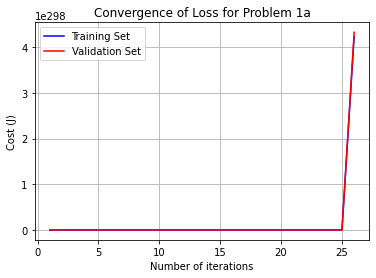

In [17]:
#The loss for Problem 1a and 1b will not converge becuase of the large values being used
#If the iterations and alpha values were changed such to accomadate such large data values
#then the loss will converge


plt.plot(range(1,iterations+1),cost_historyX1aT,color='blue', label='Training Set')
plt.plot(range(1,iterations+1),cost_historyX1aV,color='red', label='Validation Set')
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Loss for Problem 1a')
plt.legend()

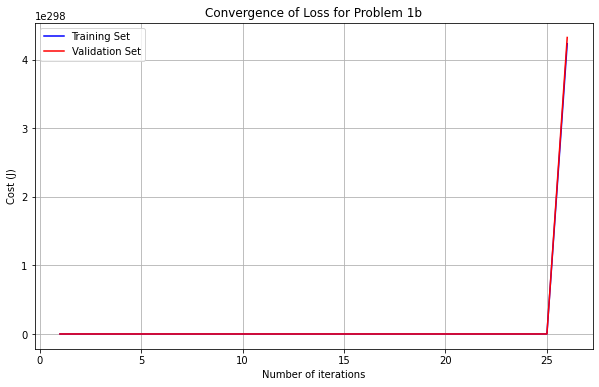

In [18]:
plt.plot(range(1,iterations+1),cost_historyX1bT,color='blue', label='Training Set')
plt.plot(range(1,iterations+1),cost_historyX1bV,color='red', label='Validation Set')
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Loss for Problem 1b')
plt.legend()

In [19]:
# The cost history and final theta for Problem 2a

finalTheta2a ,cost_historyX2aT, cost_historyX2aV = gradient_descent(inputTrain2a, outputTrain2a, inputTest2a, outputTest2a, thetaProb1a, alpha, iterations, 0, 0)

print('Final value of theta for Problem 2a =', finalTheta2a)
print('Cost history for training in Problem 2a =', cost_historyX2aT)
print('Cost history for validation in Problem 2a = ', cost_historyX2aV)

Final value of theta for Problem 2a = [0.11815337 0.15157406 0.09821536 0.12382956 0.12584969 0.12338167]
Cost history for training in Problem 2a = [0.04479276 0.04382533 0.04288383 ... 0.00623168 0.00623092 0.00623015]
Cost history for validation in Problem 2a =  [0.04945175 0.04845315 0.04748131 ... 0.00900847 0.00900748 0.0090065 ]


In [20]:
# The cost history and final theta for Problem 2b

finalTheta2b ,cost_historyX2bT, cost_historyX2bV = gradient_descent(inputTrain2b, outputTrain2b, inputTest2b, outputTest2b, thetaProb1b, alpha, iterations, 0, 0)

print('Final value of theta for Problem 2b =', finalTheta2b)
print('Cost history for training in Problem 2b =', cost_historyX2bT)
print('Cost history for validation in Problem 2b = ', cost_historyX2bV)

Final value of theta for Problem 2b = [0.04564327 0.10479255 0.06682968 0.11073171 0.10091281 0.09262359
 0.05513826 0.03851545 0.03777572 0.03860556 0.08521525 0.05003764]
Cost history for training in Problem 2b = [0.04387107 0.04205062 0.04032072 ... 0.00464777 0.0046472  0.00464664]
Cost history for validation in Problem 2b =  [0.04852829 0.04667428 0.04491106 ... 0.00645247 0.00645179 0.00645111]


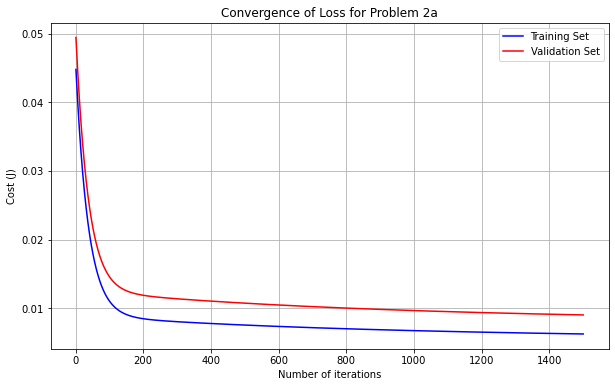

In [21]:
plt.plot(range(1,iterations+1),cost_historyX2aT,color='blue', label='Training Set')
plt.plot(range(1,iterations+1),cost_historyX2aV,color='red', label='Validation Set')
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Loss for Problem 2a')
plt.legend()

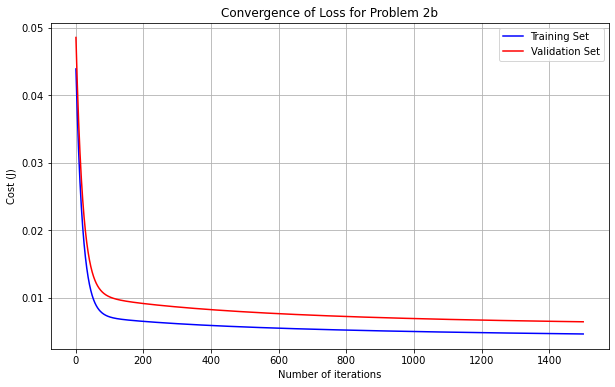

In [22]:
plt.plot(range(1,iterations+1),cost_historyX2bT,color='blue', label='Training Set')
plt.plot(range(1,iterations+1),cost_historyX2bV,color='red', label='Validation Set')
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Loss for Problem 2b')
plt.legend()

In [23]:
# The cost history and final theta for Problem 3a

finalTheta3a ,cost_historyX3aT, cost_historyX3aV = gradient_descent(inputTrain2a, outputTrain2a, inputTest2a, outputTest2a, thetaProb1a, alpha, iterations, lam, 1)

print('Final value of theta for Problem 3a =', finalTheta3a)
print('Cost history for training in Problem 3a =', cost_historyX3aT)
print('Cost history for validation in Problem 3a = ', cost_historyX3aV)

Final value of theta for Problem 3a = [0.11824798 0.15137687 0.09817135 0.12364124 0.12573526 0.12325808]
Cost history for training in Problem 3a = [0.04479777 0.04383529 0.04289868 ... 0.00705068 0.00705012 0.00704956]
Cost history for validation in Problem 3a =  [0.04946339 0.04847628 0.04751579 ... 0.01090793 0.01090741 0.0109069 ]


In [24]:
# The cost history and final theta for Problem 3b

finalTheta3b ,cost_historyX3bT, cost_historyX3bV = gradient_descent(inputTrain2b, outputTrain2b, inputTest2b, outputTest2b, thetaProb1b, alpha, iterations, lam, 1)

print('Final value of theta for Problem 3b =', finalTheta3b)
print('Cost history for training in Problem 3b =', cost_historyX3bT)
print('Cost history for validation in Problem 3b = ', cost_historyX3bV)

Final value of theta for Problem 3b = [0.04572316 0.10464795 0.0667867  0.11055552 0.10080832 0.09252079
 0.05518454 0.03849986 0.03777452 0.03854697 0.0851839  0.0500108 ]
Cost history for training in Problem 3b = [0.0438843  0.04207677 0.04035947 ... 0.00567387 0.00567349 0.0056731 ]
Cost history for validation in Problem 3b =  [0.04855903 0.04673501 0.04500108 ... 0.00883474 0.00883448 0.00883423]


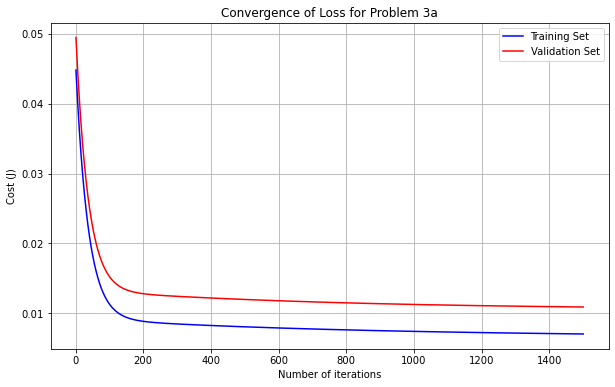

In [25]:
plt.plot(range(1,iterations+1),cost_historyX3aT,color='blue', label='Training Set')
plt.plot(range(1,iterations+1),cost_historyX3aV,color='red', label='Validation Set')
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Loss for Problem 3a')
plt.legend()

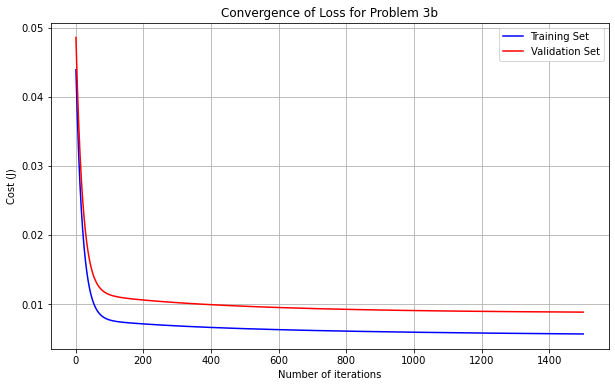

In [26]:
plt.plot(range(1,iterations+1),cost_historyX3bT,color='blue', label='Training Set')
plt.plot(range(1,iterations+1),cost_historyX3bV,color='red', label='Validation Set')
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Loss for Problem 3b')
plt.legend()